# Import libs

In [1]:
import pandas as pd
import numbers
pd.options.mode.chained_assignment =default='warn'
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import statsmodels.api as sm


# Read data from dict and csv

In [2]:
df = pd.read_csv('student-por.csv')
print(df.columns)
df.columns = ['school', 'sex', 'age', 'rural', 'big_family', 'divorced', 'mom_edu', 'dad_edu',
       'mom_job', 'dad_job', 'reason_for_school', 'guardian', 'travel_time', 'study_time',
       'failures', 'extra_school_support', 'extra_family_support', 'paid', 'extracurricular', 'preschool',
       'college', 'internet_access', 'dating', 'home_life', 'free_time', 'party', 'wd_drinker',
       'weekend_drinker', 'health', 'absences', 'fall_grade', 'spring_grade', 'final_grade']
dictionary = pd.read_csv('dict.csv')
dictionary.drop(["Unnamed: 2"], 1)
dictionary['col'] = df.columns


Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


# Transform data to readable format

In [3]:
original_data = df.copy()
df = df.replace(['yes', 'no'], [1,0])
df.divorced = df.divorced.replace(["A", "T"], [1,0])
df.big_family = df.big_family.replace(["LE3", "GT3"], [0,1])
df.rural = df.rural.replace(["U","R"], [0,1])
df.sex = df.sex.replace(["M","F"], [0,1])
df.school = df.school.replace(["GP","MS"], [1,2])
df.guardian = df.guardian.replace(["mother","father", "other"], [1,2,3])
df.mom_job = df.mom_job.replace(["teacher","health","services","at_home","other"], [1,2,3,4,5])
df.dad_job = df.dad_job.replace(["teacher","health","services","at_home","other"], [1,2,3,4,5])
df.reason_for_school = df.reason_for_school.replace(["home","reputation", "course","other"], [1,2,3,4])
df['index'] = df.index
df["risk_score"] = df.wd_drinker * df.weekend_drinker


df['school_GP'] = df.school.replace([1,2], [1,0])#["GP","MS"], [1,2])
df['school_MS'] = df.school.replace([1,2], [0,1])

df['guard_mom'] = df.guardian.replace([1,2,3], [1,0,0])#["mother","father", "other"], [1,2,3])
df['guard_dad'] = df.guardian.replace([1,2,3],[0,1,0])#["mother","father", "other"], [1,2,3])
df['guard_other'] = df.guardian.replace([1,2,3], [0,0,1])#["mother","father", "other"], [1,2,3])

#["teacher","health","services","at_home","other"], [1,2,3,4,5])
df['mom_teach'] = df.mom_job.replace([1,2,3,4,5], [1,0,0,0,0])
df['mom_health'] = df.mom_job.replace([1,2,3,4,5], [0,1,0,0,0])
df['mom_service'] = df.mom_job.replace([1,2,3,4,5], [0,0,1,0,0])
df['mom_home'] = df.mom_job.replace([1,2,3,4,5], [0,0,0,1,0])
df['mom_other'] = df.mom_job.replace([1,2,3,4,5], [0,0,0,0,1])

df['dad_teach'] = df.dad_job.replace([1,2,3,4,5], [1,0,0,0,0])
df['dad_health'] = df.dad_job.replace([1,2,3,4,5], [0,1,0,0,0])
df['dad_service'] = df.dad_job.replace([1,2,3,4,5], [0,0,1,0,0])
df['dad_home'] = df.dad_job.replace([1,2,3,4,5], [0,0,0,1,0])
df['dad_other'] = df.dad_job.replace([1,2,3,4,5], [0,0,0,0,1])

#df.reason_for_school = df.reason_for_school.replace(["home","reputation", "course","other"], [1,2,3,4])
df['reason_home'] = df.reason_for_school.replace([1,2,3,4], [1,0,0,0])
df['reason_rep'] = df.reason_for_school.replace([1,2,3,4], [0,1,0,0])
df['reason_course'] = df.reason_for_school.replace([1,2,3,4], [0,0,1,0])
df['reason_other'] = df.reason_for_school.replace([1,2,3,4], [0,0,0,1])

# Build dictionary for translation

In [4]:
dictionary.columns = ['original_name', 'meaning', 'classes', 'col']
dictionary = dictionary.replace(np.nan, '', regex=True)
dictionary  = dictionary.set_value(5, 'classes', "1 = divorced")
dictionary  = dictionary.set_value(4, 'classes', "1 = >3")
dictionary  = dictionary.set_value(3, 'classes', "1 = rural")
dictionary  = dictionary.set_value(1, 'classes', "0=male, 1=female")
dictionary  = dictionary.set_value(0, 'classes', "1=GP 1=MS")
dictionary  = dictionary.set_value(11, 'classes', "1=mother, 2=father, 3=other")
dictionary  = dictionary.set_value(8, 'classes', "1=teacher, 2=health 3=services 4=at_home 5=other")
dictionary  = dictionary.set_value(9, 'classes', "1=teacher, 2=health 3=services 4=at_home 5=other")
dictionary  = dictionary.set_value(10, 'classes', "1=close to home, 2=reputation 3=course4 =other")
pd.set_option('display.max_colwidth', -1)

In [5]:
#make sure all columns are numerical
for col in df.columns:
    if not(isinstance(df[col][0], numbers.Integral)):
        print(col)

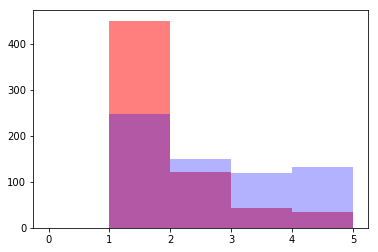

[   0.  451.  121.   43.   34.]
[   0.  247.  150.  120.  132.]


In [6]:
bins=np.arange(0, 6)
x =plt.hist(df.wd_drinker,facecolor ='red', alpha=.5, bins=bins)
y =plt.hist(df.weekend_drinker,facecolor ='blue',alpha=.3, bins=bins)
plt.style.use('fivethirtyeight')
plt.style.use('ggplot') 
plt.show()
print(x[0])
print(y[0])

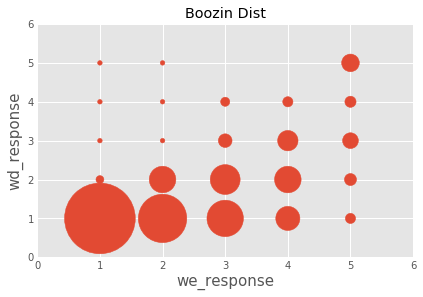

In [7]:
face = []
for i in df.index:
    face.append((df.iloc[i].weekend_drinker,df.iloc[i].wd_drinker))
letter_counts = Counter(face)
no = pd.DataFrame.from_dict(letter_counts, orient='index')
x=[]
y=[]
s=[]
no.columns = ["tuples"]
for i in range(len(no.index)):
    x.append(no.index[i][0])
    y.append(no.index[i][1])
    s.append(5000*no.tuples[i]/241)
plt.scatter(x, y, s)
plt.xlim(0,6)
plt.ylim(0,6)
plt.xlabel("we_response", fontsize=15)
plt.ylabel("wd_response", fontsize=15)
plt.title('Boozin Dist')
plt.grid(True)
plt.show()

# Potential metrics and distributions

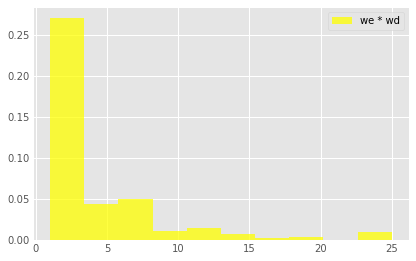

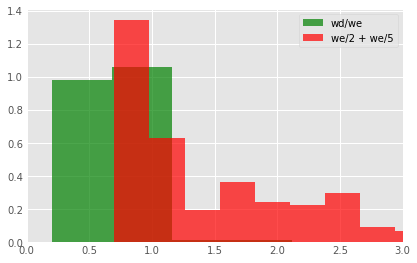

In [8]:
df["we*wd"] = df.wd_drinker * df.weekend_drinker
df["wd/we"] = df.wd_drinker / df.weekend_drinker
df["we/2twd/5"] = df.wd_drinker/5 + df.weekend_drinker/2
df["wetwd"] = df.wd_drinker + df.weekend_drinker
df["2wdtwe"] = 2*df.wd_drinker + df.weekend_drinker

handles = ["we + wd", "2wd + we", "we * wd", "wd/we","we/2 + we/5"]
binwidth = .05
bins=np.arange(0, 3.5, .05)

plt.hist(df["wetwd"], normed=1,facecolor ='blue', alpha =.7)
plt.hist(df["2wdtwe"], normed=1,facecolor ='black', alpha =.7)
plt.grid(True)
plt.legend(handles[0:2])
plt.show()
plt.hist(df["we*wd"],normed=1, facecolor='yellow', alpha=.75)
plt.grid(True)
plt.legend(handles[2:3])
plt.show()
plt.xlim(0,3)
plt.hist(df["wd/we"], normed=True, facecolor ='green', alpha =.7)#, bins=bins)
plt.hist(df["we/2twd/5"],normed=True,facecolor ='red', alpha =.7)#, bins=bins)
plt.grid(True)
plt.legend(handles[3:])
plt.show()

# Label data 

In [147]:
#https://www.sciencedaily.com/releases/2010/05/100531190855.htm
#http://www.who.int/substance_abuse/publications/global_alcohol_report/profiles/prt.pdf
#prolly should label top 10% as high risk, and bottom 60 as no risk.
metric = ['we/2twd/5']
l0 = df[df['we/2twd/5'] > 2.6]
l1 = df[(df['we/2twd/5'] <= 2.6) & (df['we/2twd/5'] > 1.4)]
l2 = df[df['we/2twd/5'] <= 1.4]
labels = ['high_risk', 'low_risk', 'no_risk']
ls = []
for r in range(len(df)):
    if df.loc[r]['index'] in l0.index:
        ls.append(labels[0])
    elif df.loc[r]['index'] in l1.index:
        ls.append(labels[1])
    elif df.loc[r]['index'] in l2.index:
        ls.append(labels[2])
    else: 
        print('something went wrong')
        
df['label'] = ls
print(labels[0] +': '+ str(len(df.loc[df.label == labels[0]])))
print(labels[1] +': '+ str(len(df.loc[df.label == labels[1]])))
print(labels[2] +': '+ str(len(df.loc[df.label == labels[2]])))


high_risk: 50
low_risk: 206
no_risk: 393


In [9]:
#https://www.sciencedaily.com/releases/2010/05/100531190855.htm
#http://www.who.int/substance_abuse/publications/global_alcohol_report/profiles/prt.pdf
#prolly should label top 10% as high risk, and bottom 60 as no risk.
metric = ['we/2twd/5']
l0 = df.sort_values(metric, ascending=[1])[-65:]
l1 = df.sort_values(metric, ascending=[1])[390:600]
l2 = df.sort_values(metric, ascending=[1])[:390]
labels = ['high_risk', 'low_risk', 'no_risk']
ls = []
for r in range(len(df)):
    if df.loc[r]['index'] in l0.index:
        ls.append(labels[0])
    elif df.loc[r]['index'] in l1.index:
        ls.append(labels[1])
    elif df.loc[r]['index'] in l2.index:
        ls.append(labels[2])
    else: 
        print('something went wrong')
        
df['label'] = ls
print(labels[0] +': '+ str(len(df.loc[df.label == labels[0]])))
print(labels[1] +': '+ str(len(df.loc[df.label == labels[1]])))
print(labels[2] +': '+ str(len(df.loc[df.label == labels[2]])))


high_risk: 65
low_risk: 194
no_risk: 390


# Seperate training data and test data randomly

In [10]:
test = df.sample(n=round(len(df)/3), replace=False,random_state=6)
train = df[~df.index.isin(test.index)]
print(len(train)+ len(test))

649


In [11]:
cols = [ 'sex', 'age', 'rural', 'big_family', 'divorced', 'mom_edu',
       'dad_edu','travel_time', 'study_time', 'failures', 'extra_school_support',
       'extra_family_support', 'paid', 'extracurricular', 'preschool',
       'college', 'internet_access', 'dating', 'home_life', 'free_time',
       'party', 'health', 'absences',
       'fall_grade', 'spring_grade', 'final_grade',
       'school_GP', 'school_MS', 
       'guard_mom', 'guard_dad', 'guard_other',
       'mom_teach', 'mom_health', 'mom_service', 'mom_home', 'mom_other',
       'dad_teach', 'dad_health', 'dad_service', 'dad_home', 'dad_other',
       'reason_home', 'reason_rep', 'reason_course', 'reason_other'
       ] 
#       'we*wd', 'wd/we', 'we/2twd/5', 'wetwd', '2wdtwe', 'label']

In [12]:
cols = ['divorced', 'mom_edu',
       'dad_edu','study_time', 'failures', 'extra_school_support',
       'extra_family_support', 'extracurricular', 
       'college', 'dating', 'home_life', 'free_time',
       'health', 'absences']
len(cols)

14

In [13]:
cols = ['divorced', 'mom_edu',
       'dad_edu','study_time', 'failures', 'extra_school_support',
       'extra_family_support', 'extracurricular', 
       'college', 'dating', 'home_life', 'free_time',
       'health', 'absences']
len(cols)

14

In [17]:
#['we*wd', 'we/2twd/5', 'wetwd', '2wdtwe']
cols=['home_life', 'failures', 'extra_school_support', 'free_time', 'absences', 'mom_edu']
#cols =['free_time']
metric = ['we/2twd/5']
x_train = train[cols]
x_test = test[cols]
#print(x_test.shape)
#print(x_test.columns)
y_train = train[metric]
y_test = test[metric]

# Train the model using training sets, using Ordinary Least Square method
results = sm.OLS(y_train, x_train).fit()
print(results.summary())
y_test['preds'] = results.predict(x_test)
a = y_test['preds'] - y_test['we/2twd/5']
b1= (np.mean(a))**2
print("MSE "+ str(b1))

#['we*wd', 'we/2twd/5', 'wetwd', '2wdtwe']
#cols=['home_life', 'failures', 'extra_school_support', 'free_time', 'absences', 'mom_edu']
cols =['free_time']
metric = ['we/2twd/5']
x_train = train[cols]
x_test = test[cols]
#print(x_test.shape)
#print(x_test.columns)
y_train = train[metric]
y_test = test[metric]

# Train the model using training sets, using Ordinary Least Square method
results = sm.OLS(y_train, x_train).fit()
print(results.summary())
y_test['preds'] = results.predict(x_test)
a = y_test['preds'] - y_test['we/2twd/5']
b2= (np.mean(a))**2
print("MSE "+ str(b2))
print(b2-b1)

                            OLS Regression Results                            
Dep. Variable:              we/2twd/5   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     237.9
Date:                Wed, 03 May 2017   Prob (F-statistic):          9.49e-133
Time:                        19:17:35   Log-Likelihood:                -510.88
No. Observations:                 433   AIC:                             1034.
Df Residuals:                     427   BIC:                             1058.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
home_life                0.0824 

/home/kurt.bognar/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/kurt.bognar/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [15]:
#['we*wd', 'we/2twd/5', 'wetwd', '2wdtwe']
cols=['home_life', 'failures', 'extra_school_support', 'free_time', 'absences', 'mom_edu']
#cols =['free_time']
metric = ['wetwd']
x_train = train[cols]
x_test = test[cols]
#print(x_test.shape)
#print(x_test.columns)
y_train = train[metric]
y_test = test[metric]

# Train the model using training sets, using Ordinary Least Square method
results = sm.OLS(y_train, x_train).fit()
print(results.summary())
y_test['preds'] = results.predict(x_test)
a = y_test['preds'] - y_test['wetwd']
b1= (np.mean(a))**2
print("MSE "+ str(b1))


cols =['free_time']
x_train = train[cols]
x_test = test[cols]
#print(x_test.shape)
#print(x_test.columns)
y_train = train[metric]
y_test = test[metric]

# Train the model using training sets, using Ordinary Least Square method
results = sm.OLS(y_train, x_train).fit()
print(results.summary())
y_test['preds'] = results.predict(x_test)
a = y_test['preds'] - y_test['wetwd']
b2= (np.mean(a))**2
print("MSE "+ str(b2))
print(b2-b1)

                            OLS Regression Results                            
Dep. Variable:                  wetwd   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     244.4
Date:                Wed, 03 May 2017   Prob (F-statistic):          1.15e-134
Time:                        19:16:55   Log-Likelihood:                -925.58
No. Observations:                 433   AIC:                             1863.
Df Residuals:                     427   BIC:                             1888.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
home_life                0.2268 

/home/kurt.bognar/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/kurt.bognar/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [16]:
y_test['pgreds'] = results.predict(x_test)
a = y_test['preds'] - y_test['wetwd']
b1= (np.mean(a))**2
print("MSE "+ str(b1))

MSE 0.09064722750274241


/home/kurt.bognar/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [24]:
cols=['home_life', 'failures', 'extra_school_support', 'free_time', 'absences', 'mom_edu']
#cols =['free_time']
metric = ['we/2twd/5']
x_train = train[cols]
x_test = test[cols]
#print(x_test.shape)
#print(x_test.columns)
y_train = train[metric]
y_test = test[metric]

# Train the model using training sets, using Ordinary Least Square method
results = sm.OLS(y_train, x_train).fit()
print(results.summary())
y_test['preds'] = results.predict(x_test)
a = y_test['preds'] - y_test['we/2twd/5']
b1= (np.mean(a))**2
print("MSE "+ str(b1))
y_test['preds']

                            OLS Regression Results                            
Dep. Variable:              we/2twd/5   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     237.9
Date:                Wed, 03 May 2017   Prob (F-statistic):          9.49e-133
Time:                        19:21:42   Log-Likelihood:                -510.88
No. Observations:                 433   AIC:                             1034.
Df Residuals:                     427   BIC:                             1058.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
home_life                0.0824 

/home/kurt.bognar/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


420    1.054561
539    1.185956
582    1.044481
243    0.896132
91     2.013109
349    1.172864
382    1.148161
169    1.524941
106    0.864392
325    2.474800
59     1.260065
134    1.378924
228    1.457901
309    1.825272
629    1.537273
390    1.576761
223    1.627435
376    1.504264
43     1.386592
248    1.267021
646    0.579993
160    1.087488
351    2.089919
162    1.616168
407    1.611913
212    2.207739
436    1.546862
196    1.486041
461    0.866642
2      1.152867
         ...   
448    1.375487
507    1.079183
28     1.343666
607    1.417779
41     1.940694
409    1.562691
418    1.058714
111    0.893882
135    1.354303
599    1.819425
11     1.060960
314    1.479561
411    1.685146
288    1.248798
364    1.555020
600    0.982065
366    1.285955
465    1.608726
524    1.148161
343    1.414894
568    1.542607
580    1.546862
140    1.655657
156    1.291724
131    2.193747
378    1.302990
510    1.273501
299    0.962148
190    1.321213
594    1.414894
Name: preds, dtype: floa

In [68]:
cols = ['home_life',
 'failures',
 'extra_school_support',
 'free_time',
 'absences',
 'mom_edu', 'label', 'preds']

#df.loc[df['index'].isin(y_test.index)][cols]

In [69]:
x = pd.concat([df, y_test], axis=1, join='inner', copy=True)[cols]

In [70]:
x.loc[x.label == 'no_risk' & x.preds >]

home_life  failures  extra_school_support  free_time  absences  mom_edu  \
420  4          0         0                     1          10        2         
539  1          0         0                     2          8         4         
582  1          0         0                     4          0         1         
243  3          0         0                     2          0         2         
91   4          0         0                     5          6         4         
349  5          0         0                     2          0         3         
382  4          0         0                     2          2         3         
169  2          3         0                     2          14        1         
106  5          0         1                     1          4         2         
325  4          0         0                     5          22        4         
59   4          0         0                     2          2         4         
134  3          0         0                     4          2         2         
228  5          0         0                     2          6         4         
309  5          0         0                     4          4         4         
629  3          0         0                     5          4         1         
390  4          0         0                     4          6         2         
223  4          0         0                     4          0         4         
376  4          0         0                     5          0         1         
43   5          0         1                     4          0         2         
248  3          0         0                     4          2         1         
646  1          0         0                     1          6         1         
160  2          0         0                     3          6         1         
351  5          2         0                     5          0         3         
162  4          0         0                     5          0         2         
407  3          2         0                     3          0         4         
212  4          1         0                     2          30        4         
436  4          1         0                     4          4         1         
196  5          0         0                     4          0         2         
461  4          0         0                     2          0         1         
2    4          0         1                     3          6         1         
..  ..         ..        ..                    ..         ..        ..         
448  4          0         0                     2          6         4         
507  4          0         0                     3          0         1         
28   5          0         1                     3          2         3         
607  5          0         0                     3          5         2         
41   5          0         0                     4          8         4         
409  4          0         0                     3          9         3         
418  3          0         0                     1          13        2         
111  4          0         1                     1          4         3         
135  3          0         0                     2          12        3         
599  2          0         0                     5          5         4         
11   5          0         0                     2          0         2         
314  3          0         0                     5          2         1         
411  4          0         0                     4          2         4         
288  4          0         0                     3          2         2         
364  5          0         0                     3          2         4         
600  4          0         0                     2          4         1         
366  5          0         1                     3          0         3         
465  3          1         0                     4          9         1         
524  

In [142]:
df["class"] = ""

In [143]:
df[df['we/2twd/5'] > 2.6]['class'] = len(df.loc[df['we/2twd/5'] > 2.6])*['high_risk']

df[(df['we/2twd/5'] < 2.6) & (df['we/2twd/5'] > 1.4)]['class'] = len(df.loc[(df['we/2twd/5'] < 2.6) & (df['we/2twd/5'] > 1.4)])*['low_risk']

df[df['we/2twd/5'] <1.4]['class'] = len(df.loc[df['we/2twd/5'] < 1.4])*['no_risk']

/home/kurt.bognar/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/kurt.bognar/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/kurt.bognar/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [151]:
#https://www.sciencedaily.com/releases/2010/05/100531190855.htm
#http://www.who.int/substance_abuse/publications/global_alcohol_report/profiles/prt.pdf
#prolly should label top 10% as high risk, and bottom 60 as no risk.
print(df.loc[df.label == 'no_risk'][metric].max())
print(df.loc[df.label == 'low_risk'][metric].min())
print(df.loc[df.label == 'low_risk'][metric].max())
print(df.loc[df.label == 'high_risk'][metric].min())

we/2twd/5    1.4
dtype: float64
we/2twd/5    1.5
dtype: float64
we/2twd/5    2.6
dtype: float64
we/2twd/5    2.7
dtype: float64


In [161]:
df.columns

Index(['school', 'sex', 'age', 'rural', 'big_family', 'divorced', 'mom_edu',
       'dad_edu', 'mom_job', 'dad_job', 'reason_for_school', 'guardian',
       'travel_time', 'study_time', 'failures', 'extra_school_support',
       'extra_family_support', 'paid', 'extracurricular', 'preschool',
       'college', 'internet_access', 'dating', 'home_life', 'free_time',
       'party', 'wd_drinker', 'weekend_drinker', 'health', 'absences',
       'fall_grade', 'spring_grade', 'final_grade', 'index', 'risk_score',
       'school_GP', 'school_MS', 'guard_mom', 'guard_dad', 'guard_other',
       'mom_teach', 'mom_health', 'mom_service', 'mom_home', 'mom_other',
       'dad_teach', 'dad_health', 'dad_service', 'dad_home', 'dad_other',
       'reason_home', 'reason_rep', 'reason_course', 'reason_other', 'we*wd',
       'wd/we', 'we/2twd/5', 'wetwd', '2wdtwe', 'class', 'label'],
      dtype='object')

In [165]:
cols

['home_life',
 'failures',
 'extra_school_support',
 'free_time',
 'absences',
 'mom_edu',
 'label',
 'we/2twd/5']

In [166]:
x = pd.concat([df, y_test], axis=1, join='inner', copy=True)

In [167]:
x.columns

Index(['school', 'sex', 'age', 'rural', 'big_family', 'divorced', 'mom_edu',
       'dad_edu', 'mom_job', 'dad_job', 'reason_for_school', 'guardian',
       'travel_time', 'study_time', 'failures', 'extra_school_support',
       'extra_family_support', 'paid', 'extracurricular', 'preschool',
       'college', 'internet_access', 'dating', 'home_life', 'free_time',
       'party', 'wd_drinker', 'weekend_drinker', 'health', 'absences',
       'fall_grade', 'spring_grade', 'final_grade', 'index', 'risk_score',
       'school_GP', 'school_MS', 'guard_mom', 'guard_dad', 'guard_other',
       'mom_teach', 'mom_health', 'mom_service', 'mom_home', 'mom_other',
       'dad_teach', 'dad_health', 'dad_service', 'dad_home', 'dad_other',
       'reason_home', 'reason_rep', 'reason_course', 'reason_other', 'we*wd',
       'wd/we', 'we/2twd/5', 'wetwd', '2wdtwe', 'class', 'label', 'we/2twd/5',
       'preds'],
      dtype='object')

In [187]:
len(x[x.label == 'high_risk'])


16

In [188]:
len(x[x.label == 'low_risk'])

70

In [189]:
len(x[x.label == 'no_risk'])

130

In [191]:
print(len(x.loc[(x['preds']>2.7) & (x.label == 'high_risk')]))
print(len(x.loc[(x['preds']>2.7)&(x.label == 'low_risk')]))
print(len(x.loc[(x['preds']>2.7)&(x.label == 'no_risk')]))


print(len(x.loc[(x['preds']<2.7)&(x.label == 'high_risk')&(x['preds']>=1.5)]))
print(len(x.loc[(x['preds']<2.7)&(x.label == 'low_risk')&(x['preds']>=1.5)]))
print(len(x.loc[(x['preds']<2.7)&(x.label == 'no_risk')&(x['preds']>=1.5)]))

print(len(x.loc[(x['preds']<1.5)&(x.label == 'high_risk')]))
print(len(x.loc[(x['preds']<1.5)&(x.label == 'low_risk')]))
print(len(x.loc[(x['preds']<1.5)&(x.label == 'no_risk')]))

0
0
0
9
30
48
7
40
82


In [98]:
cols =['home_life',
 'failures',
 'extra_school_support',
 'free_time',
 'absences',
 'mom_edu',
 'label', 'we/2twd/5']
